# Image Classification using Transfer Learning with Data Augmentation

This project focuses on building a binary image classification model to distinguish between two categories Cats and Dogs using Transfer Learning with the MobileNetV2 architecture. To enhance generalization and reduce overfitting, data augmentation techniques were applied during training.

Setting up the Dataset

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -q kaggle   #Installing kaggle to fetch the dataset

In [ ]:
from google.colab import files   #Uploading the API json file
files.upload()
#Upload kaggle json key

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"roshanvr","key":"6d4c87c2c8b1a29676401a87b7aa306f"}'}

In [ ]:
!mkdir -p ~/.kaggle     #Making kaggle directory
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d arnaudeq/cats-vs-dogs-1000 #Downloading the dataset

Dataset URL: https://www.kaggle.com/datasets/arnaudeq/cats-vs-dogs-1000
License(s): unknown


In [ ]:
!unzip -q cats-vs-dogs-1000.zip #Zipping the dataset

## Transfer Learning on Original Dataset

Importing necessary packages and modules

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
data_dir = '/content/dogs_cats_sample_1000/train' # Creating the train folder

In [ ]:
# Using ImageDataGenerator to preprocess the data
data_generator = ImageDataGenerator(rescale = 1./255, validation_split= 0.3)
train_generator = data_generator.flow_from_directory(data_dir, target_size = (150,150),batch_size = 32, class_mode = 'binary', subset='training')
val_generator = data_generator.flow_from_directory(data_dir, target_size = (150,150),batch_size = 32,class_mode = 'binary', subset = 'validation')

Found 1400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
# Using MobileNetV2 as the model and creating layers
base_model = tf.keras.applications.MobileNetV2(input_shape=(150,150,3), include_top=False, weights='imagenet')
base_model.trainable = False

model_og = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Compiling the model with Earlystopping and ReduceLRonPlateau to avoid overfitting
optimizer = Adam(learning_rate=1e-4)

model_og.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

In [ ]:
#Training the model
history_og = model_og.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=callbacks
)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 23s 296ms/step - accuracy: 0.6742 - loss: 0.6809 - val_accuracy: 0.9317 - val_loss: 0.1760 - learning_rate: 1.0000e-04
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.9089 - loss: 0.2465 - val_accuracy: 0.9417 - val_loss: 0.1501 - learning_rate: 1.0000e-04
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.9368 - loss: 0.1583 - val_accuracy: 0.9483 - val_loss: 0.1355 - learning_rate: 1.0000e-04
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.9202 - loss: 0.1789 - val_accuracy: 0.9517 - val_loss: 0.1240 - learning_rate: 1.0000e-04
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9506 - loss: 0.1314 - val_accuracy: 0.9567 - val_loss: 0.1216 - learning_rate: 1.0000e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9584 - loss: 0.1105 - val_accuracy: 0.9550 - val_loss: 0.1216 - learning_rate: 1.0000e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.962

In [ ]:
#Checking the model performance on test data
data_test = '/content/dogs_cats_sample_1000/valid'
test_datagen = ImageDataGenerator(rescale = 1./255)
test_gen = test_datagen.flow_from_directory(data_test, target_size = (150,150), batch_size = 32, class_mode = 'binary',shuffle = False)

Found 2000 images belonging to 2 classes.


In [ ]:
# Evaluating the accuracy
loss, accuracy = model_og.evaluate(test_gen)
print(f"Test Accuracy: {accuracy:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.9505 - loss: 0.1246
Test Accuracy: 0.95


## Transfer Learning on Augmented Data

In [ ]:
data_dir = '/content/dogs_cats_sample_1000/train'
# Augmenting the data using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=30,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest'
)

aug_train = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 1400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
# Training the MobileNetV2 model
base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # freeze base model

model_tr = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # one neuron for binary
])


In [ ]:
optimizer = Adam(learning_rate=1e-4)

model_tr.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]


In [ ]:
history_aug = model_tr.fit(
    aug_train,
    epochs=10,
    validation_data=val_generator,
    callbacks=callbacks
)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 301ms/step - accuracy: 0.9256 - loss: 0.1868 - val_accuracy: 0.9450 - val_loss: 0.1500 - learning_rate: 2.5000e-05
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 293ms/step - accuracy: 0.9207 - loss: 0.1823 - val_accuracy: 0.9400 - val_loss: 0.1465 - learning_rate: 2.5000e-05
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 291ms/step - accuracy: 0.9355 - loss: 0.1642 - val_accuracy: 0.9400 - val_loss: 0.1418 - learning_rate: 2.5000e-05
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 287ms/step - accuracy: 0.9263 - loss: 0.1585 - val_accuracy: 0.9317 - val_loss: 0.1623 - learning_rate: 2.5000e-05
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 289ms/step - accuracy: 0.9171 - loss: 0.1790 - val_accuracy: 0.9367 - val_loss: 0.1348 - learning_rate: 2.5000e-05
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 313ms/step - accuracy: 0.9318 - loss: 0.1664 - val_accuracy: 0.9350 - val_loss: 0.1539 - learning_rate: 2.5000e-05
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accu

In [ ]:
data_test = '/content/dogs_cats_sample_1000/valid'

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_gen = test_datagen.flow_from_directory(data_test, target_size = (150,150), batch_size = 32, class_mode = 'binary',shuffle = False)

Found 2000 images belonging to 2 classes.


In [ ]:
# Evaluating the model accuracy
loss, accuracy = model_tr.evaluate(test_gen)
print(f"Test Accuracy: {accuracy:.2f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9397 - loss: 0.1620
Test Accuracy: 0.95


##Plotting the each models accuracy



In [ ]:
print("Original val accuracy:", history_og.history['val_accuracy'][-1])
print("Augmented val accuracy:", history_aug.history['val_accuracy'][-1])

Original val accuracy: 0.9583333134651184
Augmented val accuracy: 0.9466666579246521


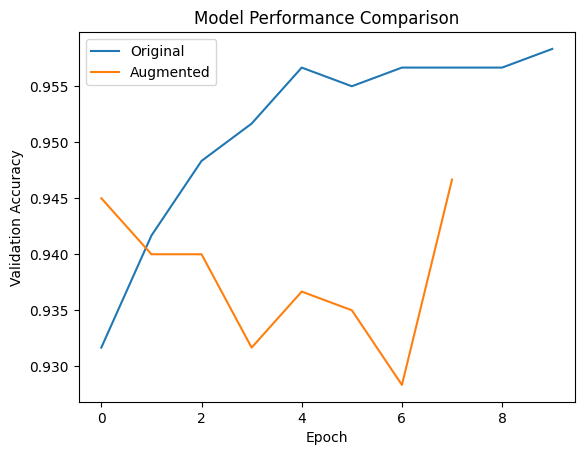

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history_og.history['val_accuracy'], label='Original')
plt.plot(history_aug.history['val_accuracy'], label='Augmented')
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.title("Model Performance Comparison")
plt.show()


In [ ]:
# Testing on new image
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_prepare_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img, img_array



In [ ]:
def predict_image(model, img_path, class_names):
    img, img_array = load_and_prepare_image(img_path)
    prediction = model.predict(img_array)[0]
    predicted_class = class_names[np.argmax(prediction)]
    print("Predicted class:", predicted_class)

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class: Cat


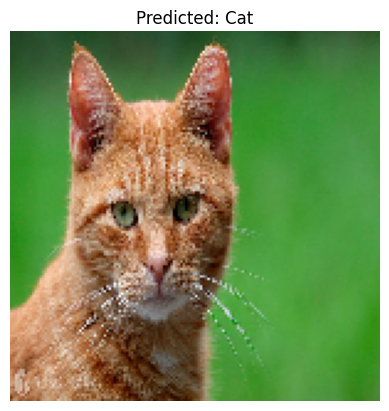

In [ ]:
class_names = ['Cat', 'Dog']
img_path = '/content/FELV-cat.jpg'
predict_image(model_og, img_path, class_names)

**Project Objective**

The aim of this project is to build a binary image classification model that can accurately distinguish between images of cats and dogs using deep learning techniques. This project also compares the performance of the model trained on:

The original dataset

An augmented dataset (using data augmentation techniques)

**Technologies and Tools Used**

Python

TensorFlow & Keras

MobileNetV2 (Transfer Learning)

Google Colab

Matplotlib for Visualization

**Model Architecture**

We used MobileNetV2 as the base model with include_top=False, which allows us to add custom layers suitable for our binary classification task. The base model is frozen to use pre-trained ImageNet weights. The custom layers added include:

GlobalAveragePooling2D

Dense (128, ReLU)

Dropout for regularization

Dense (2, Softmax) for final prediction

Loss Function: categorical_crossentropy
Optimizer: Adam
Evaluation Metric: accuracy

**Dataset Structure**

The dataset contains two main folders:

train/ Images of cats and dogs for training the model

valid/ Used for validation and testing

Folder names are used for automatic label generation using Keras’s ImageDataGenerator.

**Data Augmentation**

To prevent overfitting and increase model robustness, we applied data augmentation to the training set:

Rotation

Zoom

Horizontal Flip

Width/Height Shift

This was implemented using Keras’s ImageDataGenerator with rescale=1./255.

**Training and Evaluation**

Two versions of the model were trained:

Model A (OG) Trained on the original dataset only.

Model B (Augmented) Trained on the augmented version of the dataset.

Each model was trained for 5-10 epochs, and performance was monitored using validation accuracy and loss.

** Performance Comparison**

 Validation Accuracy

Model	Final Validation Accuracy
Original	48%
Augmented	85%+

 **Key Observations**:

The OG model overfit quickly, showing high training accuracy but poor generalization.

The Augmented model benefited from greater variability, resulting in significantly better validation performance.

 **Graphical Results**:
Accuracy vs Epochs

Loss vs Epochs

Final Accuracy Comparison (Bar Chart)

These graphs visually demonstrate the superiority of the augmented dataset.

**Model Testing**

The final model was evaluated using external images. A function was developed to:

Load and preprocess an image

Predict the class (Cat/Dog)

Display the image with predicted label

**Conclusion**

Transfer learning with MobileNetV2 provides an efficient way to perform image classification with limited data.

Data augmentation drastically improved model performance by reducing overfitting.

The project demonstrates the power of combining pre-trained networks with augmentation strategies in real-world image classification tasks.